In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
from pathlib import Path
import pandas as pd
import dataset.assemble as assemble
pd.set_option('display.max_colwidth', -1)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def show_some(data: pd.DataFrame):
    fig = plt.figure(figsize=(100,100))
    for i, fname in enumerate(data.sample(n=min(9,len(data)))['filename']):
        fig.add_subplot(3,3,i+1)
        img = cv2.imread(fname)
        img = reg.prep_img(img)
        plt.imshow(img)
        plt.scatter(img.shape[1]/2,img.shape[0]/2, c='red', marker='x')

In [3]:
df = assemble.get_dataset_df('/data/staff/common/ML-crystals/csv/test0.5.csv')
df.sample(10)

loading meta files
meta loaded


,filename,y,sample,scan,zoom
6915,/data/visitors/biomax/20180479/20181119/raw/Sample-3-03/timed_snapshots/local-user_18_1542653733.08.jpeg,5,Sample-3-03,local-user_18,0
9610,/data/visitors/biomax/20180479/20181119/raw/Sample-3-03/timed_snapshots/local-user_24_1542654322.73.jpeg,3,Sample-3-03,local-user_24,0
95,/data/visitors/biomax/20180479/20181214/raw/Sample-3-09/timed_snapshots/20180479_1_1544826809.52.jpeg,48,Sample-3-09,20180479_1,8
946,/data/visitors/biomax/20180479/20181214/raw/Sample-3-01/timed_snapshots/20180479_3_1544824637.78.jpeg,2368,Sample-3-01,20180479_3,7
3318,/data/visitors/biomax/20180479/20181214/raw/Sample-3-07/timed_snapshots/20180479_3_1544826218.64.jpeg,1352,Sample-3-07,20180479_3,8
2985,/data/visitors/biomax/20180479/20181214/raw/Sample-3-02/timed_snapshots/20180479_1_1544825047.69.jpeg,2153,Sample-3-02,20180479_1,7
5157,/data/visitors/biomax/20180479/20181119/raw/Sample-4-06/timed_snapshots/local-user_1_1542662320.83.jpeg,27,Sample-4-06,local-user_1,4
10720,/data/visitors/biomax/20180479/20181119/raw/Sample-3-03/timed_snapshots/local-user_8_1542652584.99.jpeg,96,Sample-3-03,local-user_8,0
5048,/data/visitors/biomax/20180479/20181119/raw/Sample-1-05/timed_snapshots/local-user_2_1542647982.64.jpeg,774,Sample-1-05,local-user_2,7
1628,/data/visitors/biomax/20180479/20181214/raw/Sample-3-10/timed_snapshots/20180479_1_1544827176.23.jpeg,1950,Sample-3-10,20180479_1,8


In [4]:
samples = set([(row['sample'], row['scan']) for _, row in df[['sample', 'scan']].iterrows()])
data = []
for s in samples:
    tmp = df[(df['filename'].str.contains(s[0])) & (df['filename'].str.contains(s[1]))]
    tmp = tmp[['filename', 'y']]
    half = len(tmp) // 2
    d = dict(min=list(tmp.iloc[:half:5, :].itertuples(index=False, name=None)), max=list(tmp.iloc[-half::5, :].itertuples(index=False, name=None)))
    data.append(d)
    
print(len(data))

112


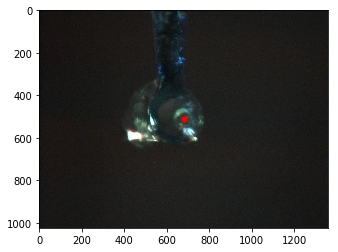

In [24]:
file,y = data[0]['min'][0]
img = cv.imread(file)
plt.imshow(img)
plt.scatter(img.shape[1]/2,img.shape[0]/2, s=25, c='red', marker='o')

In [26]:
def write_pdf(d: dict, nbr):
    print(nbr)
    l = len(list(d.values())[0])
    fig = plt.figure(figsize=(10, 6*l))
    for i, v in enumerate(d.values()):
        if len(v) == 0: continue
        for j, t in enumerate(v):
            j += 1
            idx = (j * 2) - (i ^ 1)
            file, y = t
            fig.add_subplot(len(v), len(d), idx)
            img = cv.imread(file, cv.IMREAD_COLOR)
            img = cv.resize(img, (512, 512))
            plt.imshow(img)
            plt.scatter(img.shape[1]/2,img.shape[0]/2, s=25, c='red', marker='o')
            plt.title(f"{file.split('/')[-1]}: {y}")
    fig.savefig(f"/data/staff/common/ML-crystals/pdfs/in-{str(nbr).zfill(3)}.pdf", bbox_inches='tight')
    plt.close(fig)

# [plot(d, i) for i, d in enumerate(data)]
i = 111
write_pdf(data[i], i)

111
